# Задание 3.1. Выполнить классификацию данных на примере набора данных с вином

In [1]:
import math
import numpy as np
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Реализация класса KNearestNeighbours

In [2]:
class KNearestNeighbours:
     def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours
        self.X = None
        self.y = None
    
     def fit(self,X,y):
        self.X = X
        self.y = y
        
     def predict(self, X):
        def calculateDistance(obj1,obj2):
            distance = 0
            for i in range(len(obj1)):
                distance += (obj1[i] - obj2[i]) ** 2
            return math.sqrt(distance)
        
        def findKNeighbours(testFacts,testData,currentElement,k):
            distances = []
            for i in range(len(testData)):
                distances.append(calculateDistance(currentElement,testData[i]))
            sorted_indices = np.argsort(distances)
            neighbours = np.resize(testFacts[sorted_indices], k) 
            return neighbours
        
        trainedY = []
        for i in range(len(X)):
            neighbours = findKNeighbours(self.y,self.X,X[i],self.n_neighbours)
            counts = np.bincount(neighbours)
            trainedY.append(np.argmax(counts))
        return trainedY

In [3]:
wine_dataset = load_wine()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine_dataset.data[:, [6, 12]], 
                                                    wine_dataset['target'],
                                                    random_state=0)

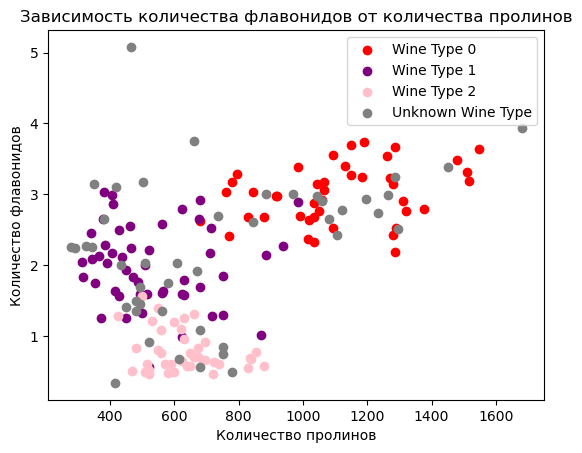

In [5]:
unique_wine_types = np.unique(wine_dataset['target'])
class_colors = {0: 'red', 1: 'purple', 2: 'pink'}

for wine_type in unique_wine_types:
    flavanoids = x_train[y_train == wine_type, 0] 
    proline = x_train[y_train == wine_type, 1]
    color = class_colors[wine_type]
    plt.scatter(proline, flavanoids,color=color, label=f'Wine Type {wine_type}')

unknown_flavanoids = x_test[:, 0] 
unknown_proline = x_test[:, 1]
plt.scatter(unknown_proline, unknown_flavanoids, color='gray', label='Unknown Wine Type')

plt.xlabel('Количество пролинов')
plt.ylabel('Количество флавонидов')
plt.title('Зависимость количества флавонидов от количества пролинов')

plt.legend()

plt.show()

### Испольуем встроенную библиотеку

In [6]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_test)

In [7]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7333333333333333


### Используем реализованный самостоятельно класс

In [12]:
Knn = KNearestNeighbours(3)
Knn.fit(x_train, y_train)
result = Knn.predict(x_test)
accuracy = accuracy_score(y_test, result)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7333333333333333


### Проверим рузультаты на графиках

#### График по предсказанным точкам

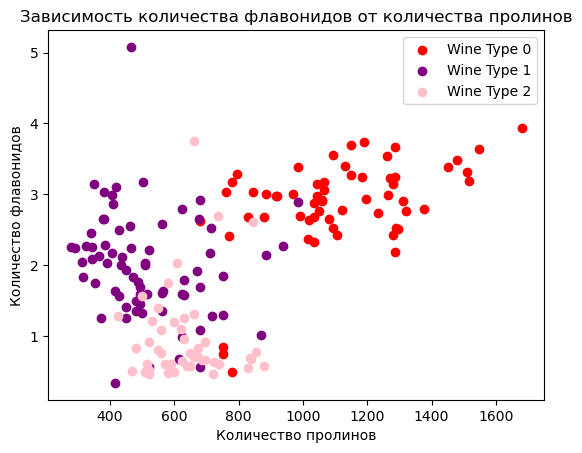

In [9]:
for wine_type in unique_wine_types:
    flavanoids_train = x_train[y_train == wine_type, 0]
    proline_train = x_train[y_train == wine_type, 1]

    flavanoids_tested = x_test[result == wine_type, 0]
    proline_tested = x_test[result == wine_type, 1]
    
    color = class_colors[wine_type]
    
    plt.scatter(proline_train, flavanoids_train, label=f'Wine Type {wine_type}', color=color)
    plt.scatter(proline_tested, flavanoids_tested, color=color)

plt.xlabel('Количество пролинов')
plt.ylabel('Количество флавонидов')
plt.title('Зависимость количества флавонидов от количества пролинов')

plt.legend()

plt.show()

#### График по изначальным данным

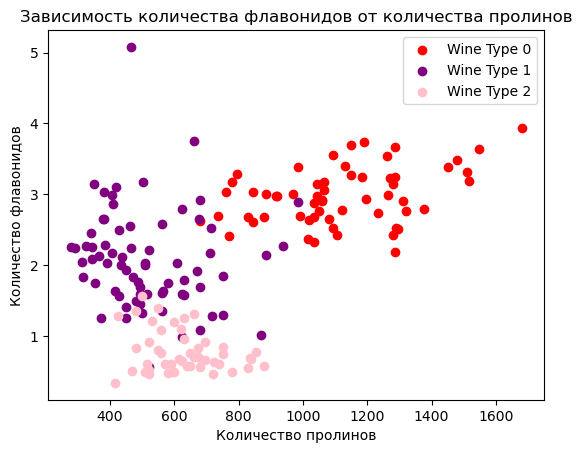

In [10]:
for wine_type in unique_wine_types:
    flavanoids = wine_dataset.data[wine_dataset['target'] == wine_type, 6]  # Крепость алкоголя
    proline = wine_dataset.data[wine_dataset['target'] == wine_type, 12]  # Количество пролинов
    color = class_colors[wine_type]
    plt.scatter(proline, flavanoids,color=color, label=f'Wine Type {wine_type}')


plt.xlabel('Количество пролинов')
plt.ylabel('Количество флавонидов')
plt.title('Зависимость количества флавонидов от количества пролинов')

plt.legend()

plt.show()